**Análisis de datos Telecom X**

#Extraer datos#

In [168]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
df = response.json()

datos = pd.json_normalize(df, sep = '_')
datos.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#Transformar datos#

In [169]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [170]:
# Conteo de valores nulos por columna
datos.isnull().sum()


,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [171]:
# Verificar filas duplicadas
duplicados = datos.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")

Filas duplicadas: 0


In [172]:
# Revisión de tipos de datos
datos.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [173]:
# Ver algunas filas para detectar posibles problemas visualmente
datos.sample(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
6148,8409-WQJUX,No,Female,0,No,No,25,No,No phone service,DSL,...,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,54.20,1423.15
1662,2360-RDGRO,No,Male,0,Yes,No,65,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.25,6812.95
2127,2984-RGEYA,No,Female,0,Yes,Yes,69,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.75,1375.4
2546,3551-HUAZH,Yes,Male,1,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,74.4
1849,2632-UCGVD,Yes,Male,1,Yes,No,66,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.05,6871.9


In [174]:
datos.tail()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [175]:
datos.shape

(7267, 21)

In [176]:
datos.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [177]:
print(datos.columns.tolist())

['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total']


Transformar datos booleanos en 1 y 0

1: True
0: False

In [178]:
columns_yes_no = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

for col in columns_yes_no:
    print(f"Valores únicos en {col}: {datos[col].unique()}")


Valores únicos en Churn: ['No' 'Yes' '']
Valores únicos en customer_Partner: ['Yes' 'No']
Valores únicos en customer_Dependents: ['Yes' 'No']
Valores únicos en phone_PhoneService: ['Yes' 'No']
Valores únicos en phone_MultipleLines: ['No' 'Yes' 'No phone service']
Valores únicos en internet_OnlineSecurity: ['No' 'Yes' 'No internet service']
Valores únicos en internet_OnlineBackup: ['Yes' 'No' 'No internet service']
Valores únicos en internet_DeviceProtection: ['No' 'Yes' 'No internet service']
Valores únicos en internet_TechSupport: ['Yes' 'No' 'No internet service']
Valores únicos en internet_StreamingTV: ['Yes' 'No' 'No internet service']
Valores únicos en internet_StreamingMovies: ['No' 'Yes' 'No internet service']
Valores únicos en account_PaperlessBilling: ['Yes' 'No']


In [179]:
columns_yes_no = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

for col in columns_yes_no:
    if col == 'Churn':
        datos[col] = datos[col].map({'Yes': 1, 'No': 0, '': np.nan})
    else:
        datos[col] = [1 if x == 'Yes' else (0 if x == 'No' else x) for x in datos[col]]

# Verificación
for col in columns_yes_no:
    print(f"{col}: {datos[col].unique()}")


Churn: [ 0.  1. nan]
customer_Partner: [1 0]
customer_Dependents: [1 0]
phone_PhoneService: [1 0]
phone_MultipleLines: [0 1 'No phone service']
internet_OnlineSecurity: [0 1 'No internet service']
internet_OnlineBackup: [1 0 'No internet service']
internet_DeviceProtection: [0 1 'No internet service']
internet_TechSupport: [1 0 'No internet service']
internet_StreamingTV: [1 0 'No internet service']
internet_StreamingMovies: [0 1 'No internet service']
account_PaperlessBilling: [1 0]


In [180]:
datos.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4


In [181]:
datos.dtypes

,0
customerID,object
Churn,float64
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,int64
customer_Dependents,int64
customer_tenure,int64
phone_PhoneService,int64
phone_MultipleLines,object
internet_InternetService,object


In [182]:
# cambiar object a float
datos['account_Charges_Total'] = pd.to_numeric(datos['account_Charges_Total'], errors='coerce')


In [183]:
datos.dtypes

,0
customerID,object
Churn,float64
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,int64
customer_Dependents,int64
customer_tenure,int64
phone_PhoneService,int64
phone_MultipleLines,object
internet_InternetService,object


In [184]:
# Crear columna de cuentas diarias
datos["Cuentas_Diarias"] = (datos["account_Charges_Monthly"] / 30).round(3)


In [185]:
(datos["Cuentas_Diarias"].dtype)


dtype('float64')

In [186]:
datos.rename(columns={
    "customerID": "ID_Cliente",
    "Churn": "Evasión",
    "customer_gender": "Género",
    "customer_SeniorCitizen": "Adulto_Mayor",
    "customer_Partner": "Tiene_Pareja",
    "customer_Dependents": "Tiene_Dependientes",
    "customer_tenure": "Meses_Conectado",
    "phone_PhoneService": "Servicio_Teléfono",
    "phone_MultipleLines": "Líneas_Múltiples",
    "internet_InternetService": "Servicio_Internet",
    "internet_OnlineSecurity": "Seguridad_En_Línea",
    "internet_OnlineBackup": "Respaldo_En_Línea",
    "internet_DeviceProtection": "Protección_Dispositivo",
    "internet_TechSupport": "Soporte_Técnico",
    "internet_StreamingTV": "TV_Streaming",
    "internet_StreamingMovies": "Películas_Streaming",
    "account_Contract": "Tipo_Contrato",
    "account_PaperlessBilling": "Factura_Electrónica",
    "account_PaymentMethod": "Método_Pago",
    "account_Charges_Monthly": "Cargos_Mensuales",
    "account_Charges_Total": "Cargos_Totales",
    "Cuentas_Diarias": "Cargos_Diarios"
}, inplace=True)

#Visualizar datos#

In [187]:
# Centrar datos para evitar confusiones y mejorar la visibilidad
datos.head().style.set_properties(**{'text-align': 'center'})


,ID_Cliente,Evasión,Género,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Conectado,Servicio_Teléfono,Líneas_Múltiples,Servicio_Internet,Seguridad_En_Línea,Respaldo_En_Línea,Protección_Dispositivo,Soporte_Técnico,TV_Streaming,Películas_Streaming,Tipo_Contrato,Factura_Electrónica,Método_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
0,0002-ORFBO,0.000000,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.600000,593.300000,2.187000
1,0003-MKNFE,0.000000,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.900000,542.400000,1.997000
2,0004-TLHLJ,1.000000,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.900000,280.850000,2.463000
3,0011-IGKFF,1.000000,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.000000,1237.850000,3.267000
4,0013-EXCHZ,1.000000,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.900000,267.400000,2.797000


In [188]:
# exportamos a JSON el Dataframe

datos.to_json("datos_final.json", orient="records", lines=True)

#Análisis Descriptivo

In [189]:
datos.describe()

,Evasión,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Conectado,Servicio_Teléfono,Factura_Electrónica,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,2.157341
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.632997,1.004322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,400.225000,1.181000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3785.300000,2.996000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958000


In [190]:
descripcion = datos.describe().rename(index={
    "count": "Conteo",
    "mean": "Media",
    "std": "Desviación_Estandar",
    "min": "Mínimo",
    "25%": "Primer_Cuartil 25%",
    "50%": "Mediana 50%",
    "75%": "Tercer_Cuartil 75%",
    "max": "Máximo"
})


In [191]:
descripcion

,Evasión,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Conectado,Servicio_Teléfono,Factura_Electrónica,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
Conteo,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
Media,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,2.157341
Desviación_Estandar,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.632997,1.004322
Mínimo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608000
Primer_Cuartil 25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,400.225000,1.181000
Mediana 50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343000
Tercer_Cuartil 75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3785.300000,2.996000
Máximo,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958000


##Análisis Visuales##

In [202]:
# Hago copia para ver la columna evasión
df_clean = datos.dropna(subset=['Evasión']).copy()

# Variable 1
df_clean['Estado'] = df_clean['Evasión'].map({
    0.0: 'Activo',
    1.0: 'Baja'
}).astype('category')

df_summary = df_clean['Estado'].value_counts().reset_index()
df_summary.columns = ['Estado', 'Clientes']
df_summary['Porcentaje'] = (df_summary['Clientes'] / df_summary['Clientes'].sum() * 100).round(1)

In [236]:
# Recuento de evasión

import plotly.express as px
import plotly.graph_objects as go

# Nuevo esquema de colores
colores = {
    'Activo': '#00BFC4',
    'Baja': '#F8766D'
}

# Gráfico circular
fig = px.pie(
    df_summary,
    names='Estado',
    values='Clientes',
    color='Estado',
    color_discrete_map=colores,
    hole=0.4,
    title='Distribución del estado de Clientes'
)

# Porcentaje como texto visible
fig.update_traces(
    textinfo='percent+label',
    textfont_size=14,
    pull=[0.03, 0],
    marker=dict(line=dict(color='white', width=2))
)

# Estadísticas a la derecha
fig.add_annotation(
    text=(
        "<b>ESTADÍSTICAS</b><br>"
        f"🟦 Activos: {df_summary[df_summary['Estado']=='Activo']['Clientes'].values[0]}<br>"
        f"🟥 Bajas: {df_summary[df_summary['Estado']=='Baja']['Clientes'].values[0]}<br>"
        f"👥 Total: {df_summary['Clientes'].sum()}"
    ),
    align='left',
    showarrow=False,
    xref='paper',
    yref='paper',
    x=1,
    y=0.9,
    bordercolor='gray',
    borderwidth=1,
    bgcolor='white',
    font=dict(size=14)
)

# Ajustes finales
fig.update_layout(
    font=dict(family="Arial"),
    margin=dict(l=50, r=150, t=50, b=50),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.2,
        xanchor='center',
        x=0.5
    )
)

fig.show()


Categorías

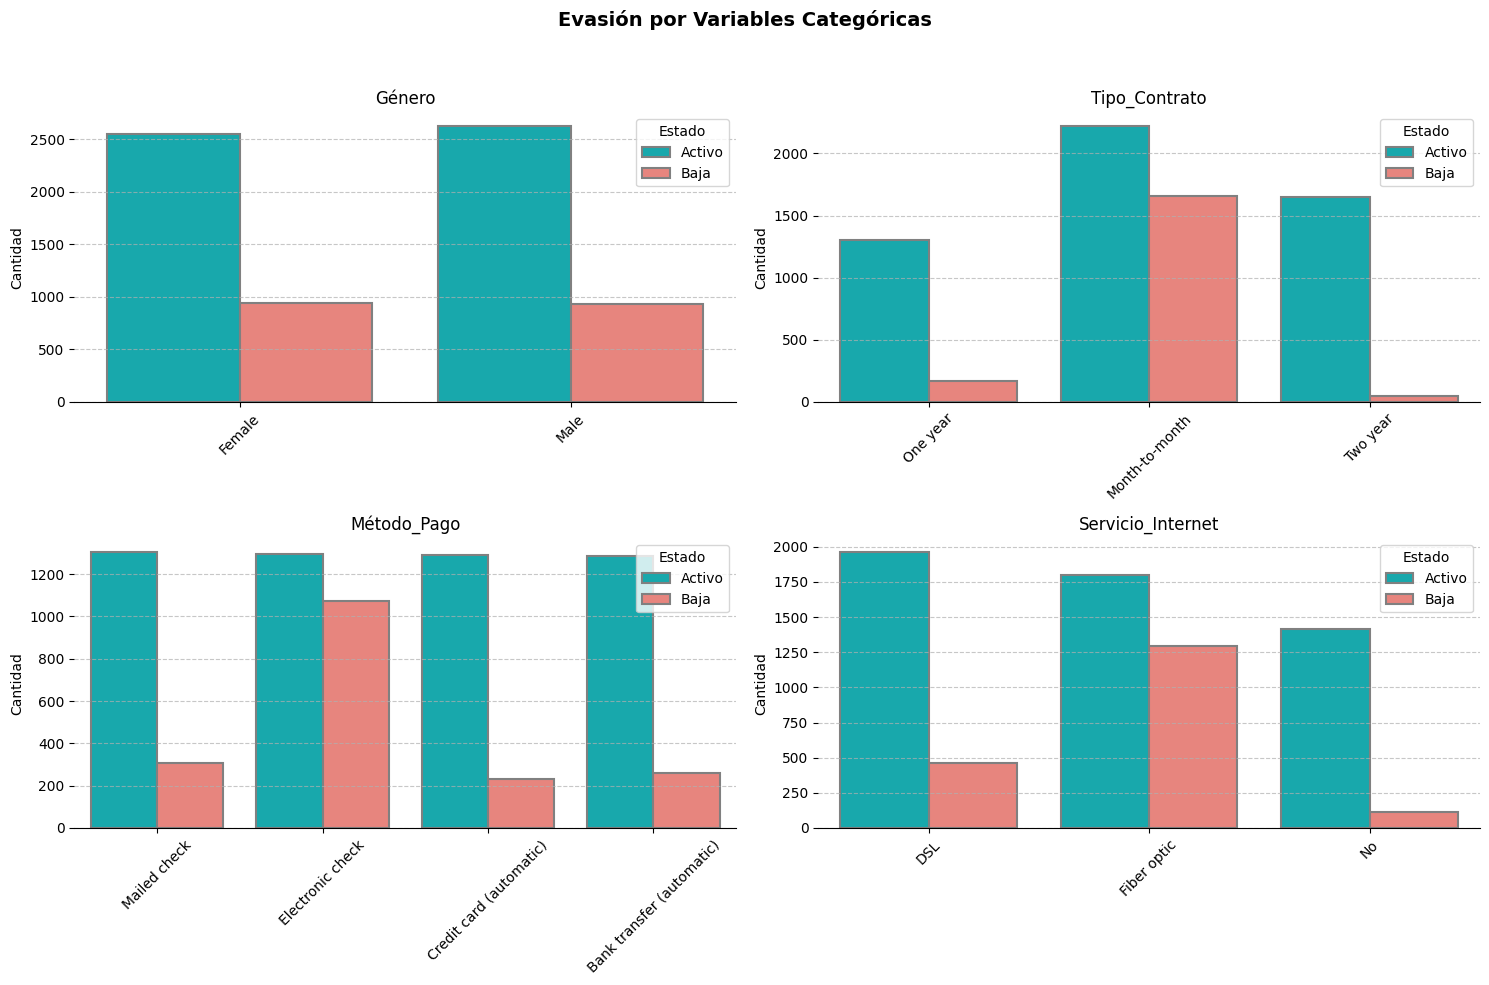

In [237]:
import seaborn as sns

# Variables
variables = ['Género', 'Tipo_Contrato', 'Método_Pago', 'Servicio_Internet']

# Colores
colores_plotly = {'Activo': '#00BFC4', 'Baja': '#F8766D'}

# figuras
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Evasión por Variables Categóricas', fontsize=14, fontweight='bold')

# Reorganizar los ejes
axes = axes.flatten()

# graficos
for i, var in enumerate(variables):
    ax = axes[i]
    sns.countplot(
        data=df_clean,
        x=var,
        hue='Estado',
        palette=colores_plotly,
        ax=ax,
        edgecolor='gray',
        linewidth=1.5
    )
    ax.set_title(f'{var}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Cantidad')
    ax.tick_params(axis='x', rotation=45)

    # Estilo
    ax.set_facecolor('white')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#Correlación entre variables#

Matriz de correlación:
                      Evasión  Adulto_Mayor  Tiene_Pareja  Tiene_Dependientes  \
Evasión              1.000000      0.150889     -0.150448           -0.164221   
Adulto_Mayor         0.150889      1.000000      0.022970           -0.212952   
Tiene_Pareja        -0.150448      0.022970      1.000000            0.448900   
Tiene_Dependientes  -0.164221     -0.212952      0.448900            1.000000   
Meses_Conectado     -0.352229      0.018187      0.377551            0.159892   
Servicio_Teléfono    0.011942      0.010060      0.018828           -0.003863   
Factura_Electrónica  0.191825      0.157734     -0.011201           -0.111752   
Cargos_Mensuales     0.193356      0.220388      0.097122           -0.115832   
Cargos_Totales      -0.199484      0.103499      0.316918            0.063960   
Cargos_Diarios       0.193355      0.220386      0.097127           -0.115826   

                     Meses_Conectado  Servicio_Teléfono  Factura_Electrónica  \
Evasi

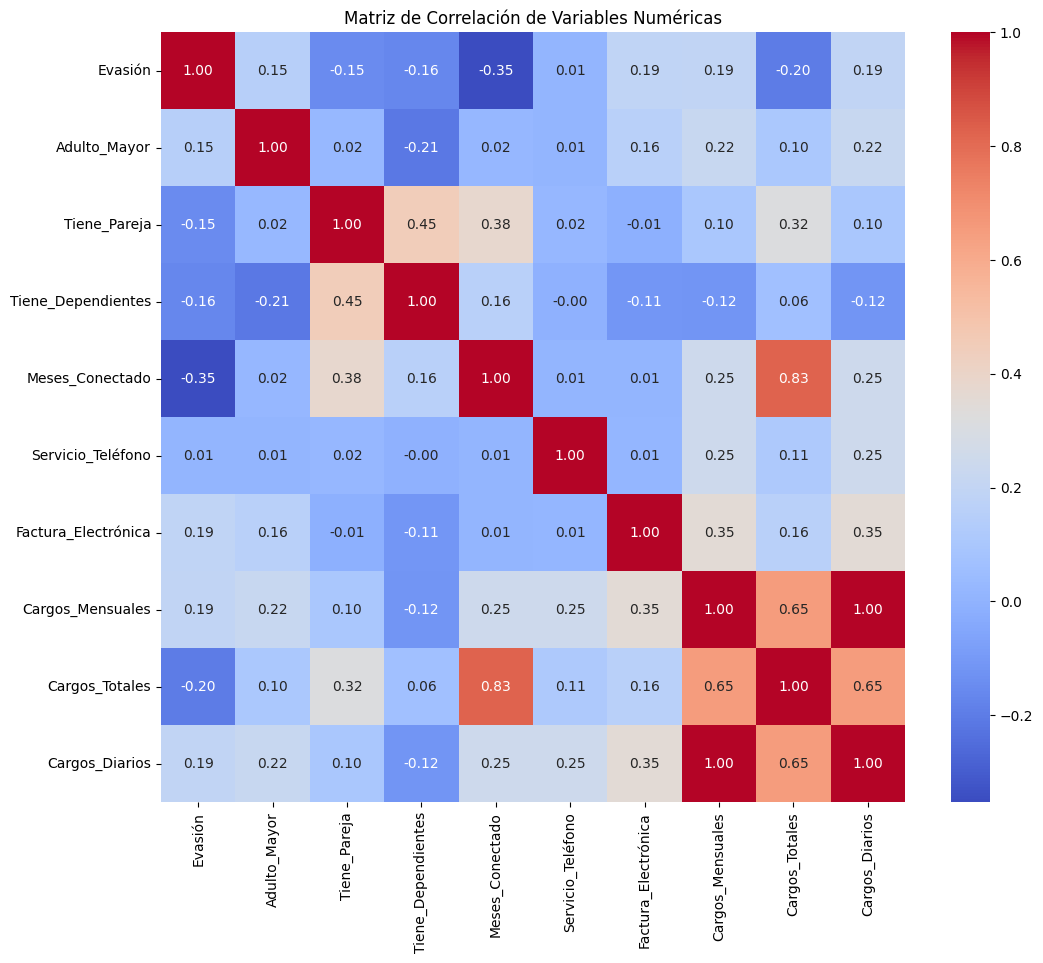

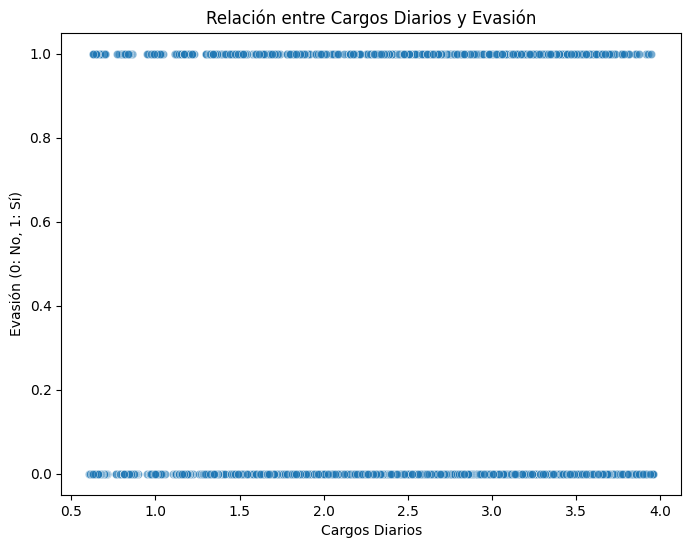

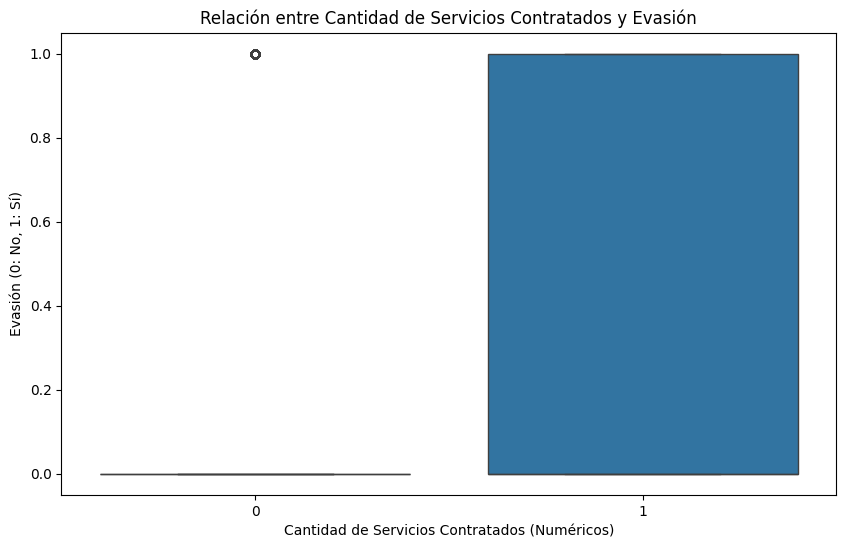

<ipython-input-239-b26146f5f788>:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




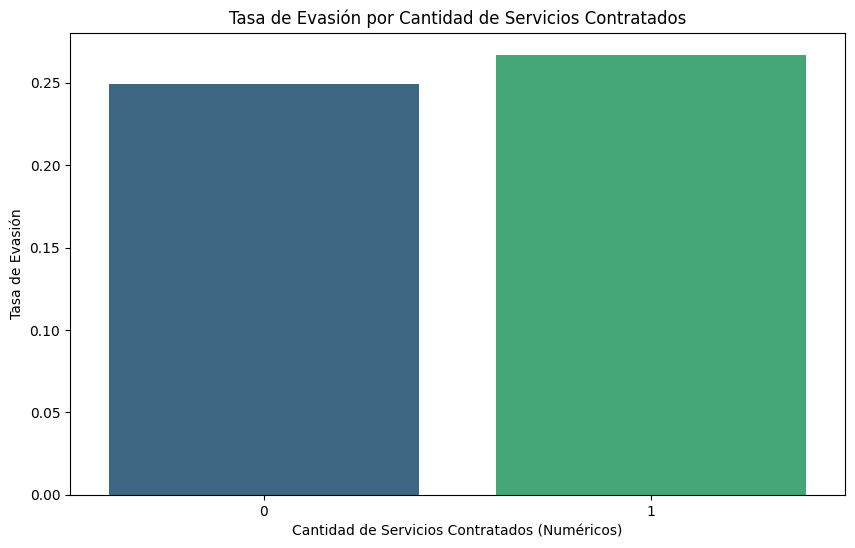

In [239]:
# Identificar variables numéricas
variables_numericas = datos.select_dtypes(include=[np.number]).columns.tolist()

# Calcular la matriz de correlación
correlacion = datos[variables_numericas].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlacion)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Explorar la relación entre cargos diarios y evasión con un gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=datos, x='Cargos_Diarios', y='Evasión', alpha=0.6)
plt.title('Relación entre Cargos Diarios y Evasión')
plt.xlabel('Cargos Diarios')
plt.ylabel('Evasión (0: No, 1: Sí)')
plt.show()

# Para analizar cómo la cantidad de servicios contratados afecta la evasión,
# primero necesitamos crear una columna que represente la cantidad de servicios.
# Asumimos que las columnas relacionadas con servicios son las siguientes (ajusta si es necesario):
columnas_servicio = [
    'Servicio_Teléfono',
    'Líneas_Múltiples',
    'Servicio_Internet', # Esta es categórica, debemos manejarla
    'Seguridad_En_Línea',
    'Respaldo_En_Línea',
    'Protección_Dispositivo',
    'Soporte_Técnico',
    'TV_Streaming',
    'Películas_Streaming'
]

# Creamos una copia del dataframe para no modificar el original en este paso
df_servicios = datos.copy()

# Convertir las columnas categóricas de servicio a numéricas si no lo están ya
# En tu código ya convertiste algunas a 0 y 1. Asegurémonos de que las usadas aquí sean numéricas.
# La columna 'Servicio_Internet' es categórica, la excluimos de la suma directa
columnas_servicio_numericas = [col for col in columnas_servicio if col in df_servicios.select_dtypes(include=np.number).columns]

df_servicios['Cantidad_Servicios'] = df_servicios[columnas_servicio_numericas].sum(axis=1)

# Explorar la relación entre la cantidad de servicios y la evasión
# Como Cantidad_Servicios será discreta, un boxplot o un gráfico de barras agrupado puede ser útil
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_servicios, x='Cantidad_Servicios', y='Evasión')
plt.title('Relación entre Cantidad de Servicios Contratados y Evasión')
plt.xlabel('Cantidad de Servicios Contratados (Numéricos)')
plt.ylabel('Evasión (0: No, 1: Sí)')
plt.show()

# También puedes agrupar por cantidad de servicios y calcular la tasa de evasión
tasa_evasion_por_servicios = df_servicios.groupby('Cantidad_Servicios')['Evasión'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=tasa_evasion_por_servicios, x='Cantidad_Servicios', y='Evasión', palette='viridis')
plt.title('Tasa de Evasión por Cantidad de Servicios Contratados')
plt.xlabel('Cantidad de Servicios Contratados (Numéricos)')
plt.ylabel('Tasa de Evasión')
plt.show()

In [241]:
# Claves Numericas
variables_numericas = ['Cargos_Mensuales', 'Cargos_Totales', 'Meses_Conectado']

# Crear un gráfico por cada variable
for var in variables_numericas:
    fig = px.box(
        df_clean,
        x='Estado',
        y=var,
        color='Estado',
        color_discrete_map={'Activo': '#00BFC4', 'Baja': '#F8766D'},
        points='all',
        title=f'Distribución de {var} por Estado'
    )

    fig.update_traces(jitter=0.3, marker_opacity=0.4)
    fig.update_layout(
        font=dict(family="Fira Code", size=14),
        yaxis_title=var,
        xaxis_title="Estado",
        boxmode='group',
        showlegend=False
    )
    fig.show()


#**Informe Final del Análisis de Evasión de Clientes Telecom X**#




# ✦ Introducción

La **evasión de clientes**, conocida también como *Churn* simboliza un gran desafío para las empresas de servicios, especialmente en sectores competitivos como las telecomunicaciones. La pérdida de clientes no solo impica la disminución de ingresos, sino también costos asociados a la adquisición de nuevos suscriptores. El presente análisis posee como objetivo identificar y comprender los factores claves que influyen en la decisión de los clientes de cancelar su servicio, utilizando técnicas de análisis exploratorios de datos (EDA), buscaremos descubrir patrones y relaciones en los datos que puedan arrojar luz sobre las razones detrás de la evasión y, en última instancia, ayudar a desarrollar estrategias para retener a los clientes.

# ✦ Limpieza y Tratamiento de Datos

El proceso de análisis empiezá extrayendo los datos desde un archivo JSON remoto para posteriormente preparar el dataset para el análisis. Los pasos clave incluyeron:

- **Carga y Normalización:** Los datos fueron cargados desde la URL proporcionada y normalizados para crear una estructura tabular manejable con Pandas.

- **Inspección Inicial:** Se revisaron las primeras y últimas filas, la información general (`.info()`), la presencia de valores nulos (`.isnull().sum()`) y filas duplicadas (`.duplicated().sum()`) para obtener una visión inicial de la calidad de los datos.

- **Revisión de Tipos de Datos:** Se examinaron los tipos de datos de cada columna (`.dtypes`) para identificar posibles inconsistencias.

- **Transformación de Variables Booleanas:** Las columnas que representaban valores booleanos ('Yes'/'No') fueron transformadas a un formato numérico (1 para 'Yes', 0 para 'No') para facilitar el análisis cuantitativo. Se manejaron los valores faltantes o inconsistentes durante esta transformación.

- **Conversión de Tipos Específicos:** Se identificó que la columna de 'Cargos_Totales' estaba como tipo 'object' debido a la presencia de posibles valores no numéricos (como cadenas vacías). Se convirtió a tipo numérico utilizando `pd.to_numeric` con `errors='coerce'` para convertir los valores problemáticos a `NaN`.

- **Creación de Nueva Variable:** Se calculó una nueva variable, 'Cuentas_Diarias' (Cargos Diarios), dividiendo los cargos mensuales por 30 y redondeando a tres decimales. Esto proporcionó una métrica de costo más granular.

- **Renombrado de Columnas:** Se renombraron las columnas para mejorar la legibilidad y comprensión de los datos en español.

- **Manejo de Valores Faltantes en 'Evasión':** Para los análisis que involucran la variable 'Evasión', se creó una copia del DataFrame (`df_clean`) donde se eliminaron las filas con valores nulos en esta columna, asegurando la integridad del análisis de evasión.

# ✦ Análisis Exploratorio de Datos (EDA)

El análisis exploratorio de datos se centró en visualizar la distribución de la variable objetivo (Evasión) y explorar las relaciones entre la evasión y otras características de los clientes y sus servicios.

- **Distribución de la Evasión:** Un gráfico circular mostró la proporción de clientes que han evadido el servicio frente a los que permanecen activos. Esto proporcionó una base para entender la magnitud del problema del Churn.

- **Evasión por Variables Categóricas:** Se utilizaron gráficos de barras agrupados para visualizar la distribución de la evasión en función de variables categóricas clave como 'Género', 'Tipo_Contrato', 'Método_Pago' y 'Servicio_Internet'. Estos gráficos permitieron identificar qué categorías dentro de estas variables presentan mayores tasas de evasión. Por ejemplo, se observó si ciertos tipos de contrato o métodos de pago están más asociados con la baja de clientes.

- **Análisis Descriptivo de Variables Numéricas:** Se calculó y presentó un resumen estadístico descriptivo de las variables numéricas (Conteo, Media, Desviación Estándar, Mínimo, Cuartiles, Máximo), renombrándolo para mayor claridad. Esto proporcionó una comprensión cuantitativa de la distribución de estas variables.

- **Correlación entre Variables Numéricas:** Se calculó y visualizó una matriz de correlación entre todas las variables numéricas del dataset. Este mapa de calor permitió identificar la fuerza y dirección de las relaciones lineales entre pares de variables, incluyendo la correlación con la variable 'Evasión'.

- **Relación entre Cargos Diarios y Evasión:** Un gráfico de dispersión exploró visualmente la relación entre los cargos diarios y la evasión.

- **Relación entre Cantidad de Servicios y Evasión:** Para investigar si la cantidad de servicios contratados influye en la evasión, se creó una variable que suma los servicios numéricos. Se utilizaron boxplots para comparar la distribución de la cantidad de servicios entre clientes activos y los que evadieron, y un gráfico de barras para visualizar la tasa de evasión promedio por cantidad de servicios.

Estos análisis visuales y cuantitativos son fundamentales para identificar patrones y características de los clientes que tienden a evadir el servicio.

# ✦ Conclusión

A partir del análisis exploratorio de datos, se pueden extraer varias conclusiones clave:

- **Tasas de Evasión:** El gráfico circular reveló la proporción actual de clientes que han evadido, proporcionando una métrica clara del problema a abordar.

- **Impacto de Variables Categóricas:** Los gráficos de barras por categoría probablemente señalaron que ciertos grupos de clientes (por ejemplo, aquellos con un tipo de contrato específico, método de pago o servicio de internet) tienen una tasa de evasión notablemente mayor. Estos segmentos representan áreas de enfoque prioritario para las estrategias de retención.

- **Correlaciones Relevantes:** La matriz de correlación y los gráficos de dispersión/boxplot para variables numéricas ayudaron a identificar qué características numéricas (como los cargos mensuales o la tenencia) están más fuertemente correlacionadas con la evasión. Por ejemplo, una alta correlación positiva entre "Cargos_Mensuales" y "Evasión" sugeriría que los clientes con facturas más altas son más propensos a irse. La exploración de la relación entre "Cargos_Diarios" y "Cantidad_Servicios" con la evasión proporcionó insights adicionales sobre cómo el costo y la amplitud de los servicios afectan la decisión del cliente.

Los insights obtenidos de este análisis visual y cuantitativo son cruciales para comprender el perfil del cliente que evade y los factores que contribuyen a esta decisión. Esta información puede ser utilizada para segmentar a los clientes en riesgo y diseñar intervenciones dirigidas.

# ✦ Recomendaciones

Basado en los hallazgos de este análisis, se sugieren las siguientes recomendaciones estratégicas para reducir la evasión de clientes:

- **Segmentación de Clientes en Riesgo:** Utilizar las características identificadas (como tipo de contrato, método de pago, servicio de internet y potencialmente los cargos mensuales/diarios) para crear modelos que predigan qué clientes tienen una alta probabilidad de evadir.

- **Estrategias de Retención Dirigidas:** Implementar programas de retención específicos para los segmentos de clientes identificados como de alto riesgo. Esto podría incluir ofertas personalizadas, mejoras en el servicio al cliente, o comunicaciones proactivas para abordar sus preocupaciones.

- **Optimización de la Oferta de Servicios:** Analizar si la cantidad de servicios contratados o los cargos asociados están contribuyendo a la evasión. Considerar la posibilidad de ofrecer paquetes de servicios más atractivos o ajustar las estructuras de precios para segmentos vulnerables.

- **Mejora en la Experiencia del Cliente:** Si el análisis sugiere que ciertos métodos de pago o tipos de contrato están asociados con una mayor evasión, investigar las razones subyacentes. Podría ser necesario mejorar la facilidad de uso de ciertos métodos de pago o la claridad de los términos del contrato.

- **Monitoreo Continuo:** Establecer un sistema para monitorear continuamente las métricas de evasión y los factores que la influyen. El análisis de datos debe ser un proceso iterativo que permita ajustar las estrategias de retención a medida que cambian las dinámicas del mercado y el comportamiento del cliente.

La implementación de estas recomendaciones, respaldada por un análisis de datos sólido, puede ayudar a Telecom X a reducir su tasa de evasión y mejorar la rentabilidad a largo plazo.